In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load datasets from Google Drive
historical_weather = pd.read_csv('/content/drive/MyDrive/historical_weather.csv')

# Display the first few rows
print(historical_weather.head())

# Check for missing values
print(historical_weather.isnull().sum())


  city_id        date  avg_temp_c  min_temp_c  max_temp_c  precipitation_mm  \
0    C001  2014-01-01         6.6        -1.4        11.6               NaN   
1    C001  2014-01-02         9.3         6.3        13.3               NaN   
2    C001  2014-01-03         7.6         1.9        14.0               NaN   
3    C001  2014-01-04         7.6         3.9        13.3               NaN   
4    C001  2014-01-05         8.6         0.5        16.9               NaN   

   snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  
0            NaN             168.0                 6.2  
1            NaN             155.0                10.0  
2            NaN               NaN                 5.8  
3            NaN             291.0                11.3  
4            NaN               NaN                 5.0  
city_id                    0
date                       0
avg_temp_c              1224
min_temp_c              5886
max_temp_c              7493
precipitation_mm       69744
snow_dept

          avg_temp_c     min_temp_c     max_temp_c  precipitation_mm  \
count  181114.000000  176452.000000  174845.000000     112594.000000   
mean       19.137516      14.627775      23.887261          3.679964   
std         9.902722      10.004998      10.446670         11.294167   
min       -34.700000     -43.800000     -28.500000          0.000000   
25%        12.400000       7.500000      17.100000          0.000000   
50%        21.400000      16.200000      27.000000          0.000000   
75%        27.100000      23.300000      31.500000          2.300000   
max        41.900000      38.900000      49.100000        496.100000   

       snow_depth_mm  avg_wind_dir_deg  avg_wind_speed_kmh  
count   12238.000000     146944.000000       159866.000000  
mean      342.481696        175.650289           11.281875  
std      1020.265388        105.435150            6.132884  
min         0.000000          0.000000            0.000000  
25%         0.000000         83.000000        

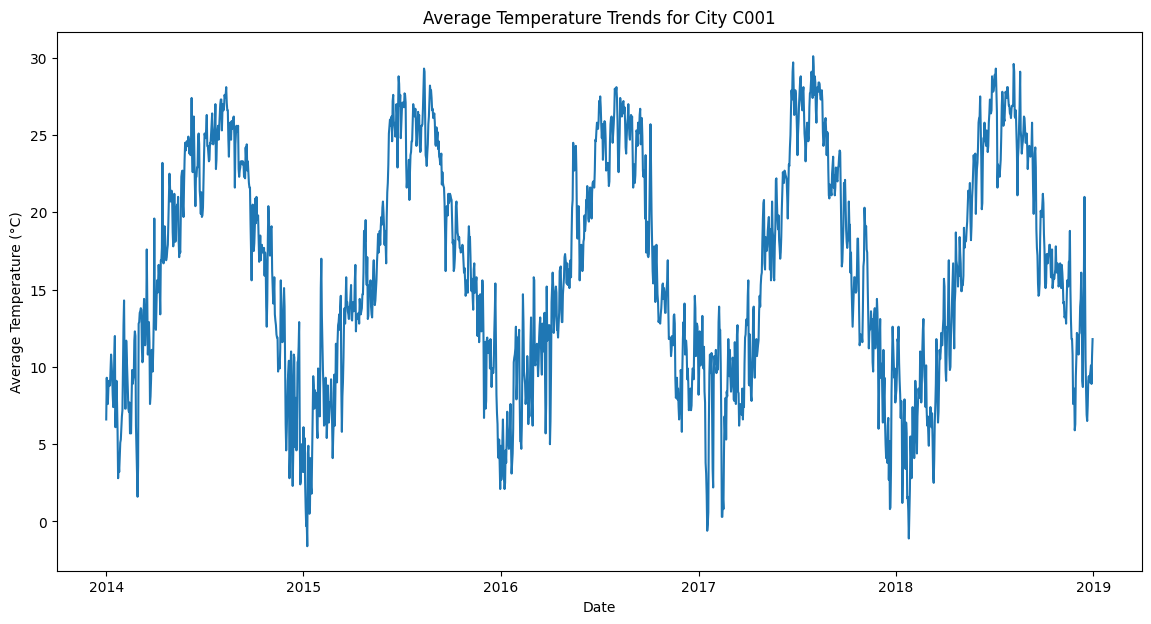

In [ ]:
# Summary statistics
print(historical_weather.describe())

# Plot temperature trends over time for a sample city
city_sample = historical_weather[historical_weather['city_id'] == 'C001']
plt.figure(figsize=(14, 7))
plt.plot(pd.to_datetime(city_sample['date']), city_sample['avg_temp_c'])
plt.title('Average Temperature Trends for City C001')
plt.xlabel('Date')
plt.ylabel('Average Temperature (°C)')
plt.show()


In [ ]:
# Convert 'date' column to datetime
historical_weather['date'] = pd.to_datetime(historical_weather['date'])

# Extract features from date
historical_weather['year'] = historical_weather['date'].dt.year
historical_weather['month'] = historical_weather['date'].dt.month
historical_weather['day_of_year'] = historical_weather['date'].dt.dayofyear


In [ ]:
# Drop the 'date' column as it's not needed for the model
data = historical_weather.drop(columns=['date'])

# Identify categorical columns
categorical_cols = ['city_id']

# Convert categorical columns to numeric using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col].astype(str))

# Create an imputer to fill missing values with mean
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Verify there are no missing values
print(data_imputed.isnull().sum())


city_id               0
avg_temp_c            0
min_temp_c            0
max_temp_c            0
precipitation_mm      0
snow_depth_mm         0
avg_wind_dir_deg      0
avg_wind_speed_kmh    0
year                  0
month                 0
day_of_year           0
dtype: int64


In [ ]:
# Separate features and target variable
X = data_imputed.drop(['avg_temp_c'], axis=1)
y = data_imputed['avg_temp_c']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


In [ ]:
# Train a linear regression model
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)

# Train a random forest model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
# Predictions
y_pred_lr = model_lr.predict(X_val_scaled)
y_pred_rf = model_rf.predict(X_val)

# Calculate RMSE
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))

print(f'Linear Regression RMSE: {rmse_lr:.2f}')
print(f'Random Forest RMSE: {rmse_rf:.2f}')
print("Features used for training:", features)

Linear Regression RMSE: 1.99
Random Forest RMSE: 1.02
Features used for training: ['year', 'month', 'day', 'dayofyear', 'temp_1d_lag', 'temp_1w_lag', 'temp_1m_lag', 'temp_1y_lag', 'temp_7d_avg', 'temp_30d_avg']


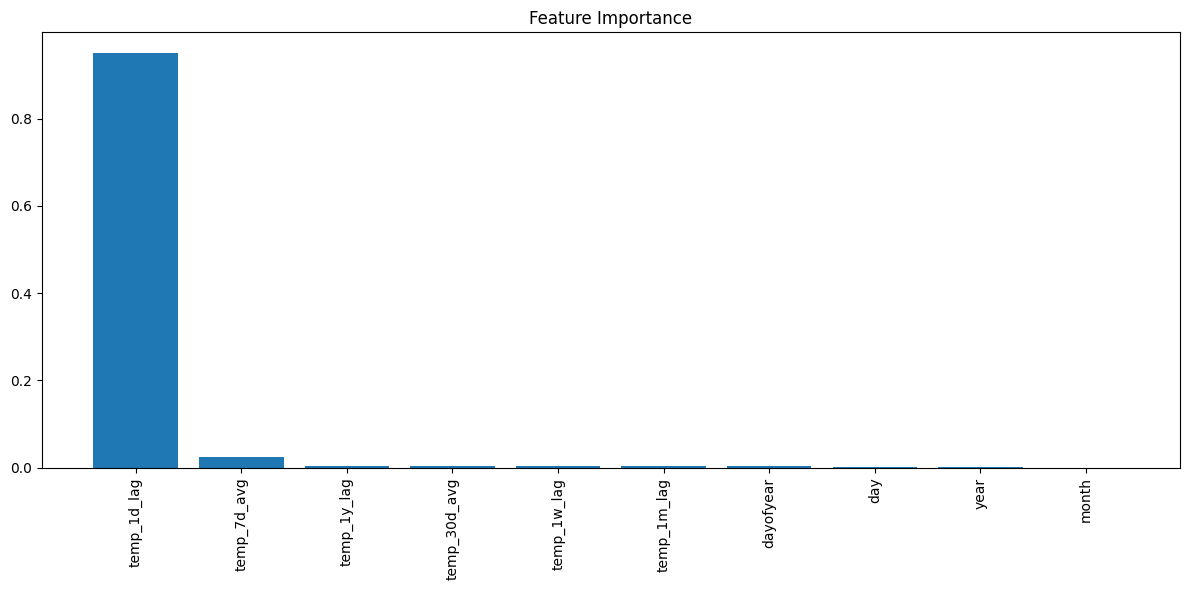

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importance")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()


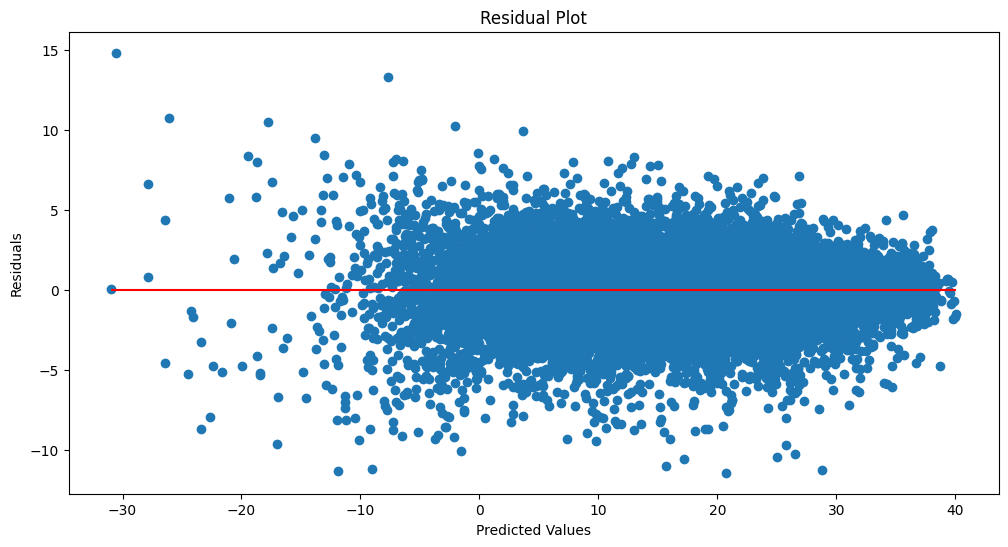

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(test_predictions, y_test - test_predictions)
plt.hlines(y=0, xmin=min(test_predictions), xmax=max(test_predictions), color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()
